In [4]:
###### -- Python Script in Jupyter to access, create and test financial data and models
###### -- By Ahmed Asiliskender, initial write date 25 June 2024
###### -- May also access MATLAB scripts through here and .py files.

### Here we initialise important libraries and variables.

# Import pandas (python data analysis lib)
%matplotlib inline
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import statsmodels.api as sm


user_header = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                                AppleWebKit/537.36 (KHTML, like Gecko) \
                                Chrome/122.0.0.0 Safari/537.36'}

# Webscrape libs
from bs4 import BeautifulSoup
import yfinance as yf
import tradingview_scraper as tvs
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from tradingview_scraper.symbols.ideas import Ideas

# Other libs
from colorama import Fore, Back, Style
import copy
import time
from datetime import datetime
import requests
from ast import literal_eval
import json
#import warnings


## To download packages using pip
import sys #! allows to use command terminal code in here
#!{sys.executable} --version
#!pip install html5lib
#!pip install bs4
#!pip install yfinance
#!pip install tradingview-scraper
#!pip install --upgrade --no-cache tradingview-scraper
#!pip install selenium







# Paid APIs, (not used, left here)

# Bloomberg (not free)
#!pip install blpapi --index-url=https://blpapi.bloomberg.com/repository/releases/python/simple/ blpapi
#!pip install xbbg
#from xbbg import blp
#blp.bdh( tickers='SPX Index', flds=['High', 'Low', 'Last_Price'], start_date='2018-10-10', end_date='2018-10-20')
#blp.bdp('AAPL US Equity', 'Eqy_Weighted_Avg_Px', VWAP_Dt='20181224')
#blp.bdp(tickers='NVDA US Equity', flds=['Security_Name', 'GICS_Sector_Name'])


### RAPID API FOR INTRADAYS (not free)
#import http.client

#conn = http.client.HTTPSConnection("yahoo-finance127.p.rapidapi.com")

#headers = {
#    'x-rapidapi-key': "2e7bf1e71cmsh8f7a5babc8f5197p1f02bejsn72107f046a86",
#    'x-rapidapi-host': "yahoo-finance127.p.rapidapi.com"
#}

#conn.request("GET", "/finance-analytics/nvda", headers=headers)

#res = conn.getresponse()
#data = res.read()

#print(data.decode("utf-8"))

In [5]:
## Here we make a stock ticker name example (we make a list, then use to make dictionary and search one, then display all)
stocks = ["NVDA"]#, "MSFT", "ARM", "^IXIC", "KO"]
names = ["Nvidia", "Microsoft", "ARM Holdings", "NASDAQ Composite", "Coca-Cola"]

stockDict = {}
i = 0

for stock in stocks:
    stockDict[stocks[i]] = names[i]
    i += 1

search = "NVDA"

print("The ticker you searched, " + search + " has ticker: " + stockDict[search])

print("The list of all tickers is:")

for ticker,  name in stockDict.items():
    print("{} with ticker {}".format(name,ticker))
## This highlights taking two items from dictionary and constructing a multi-inputted output using .format(args)



The ticker you searched, NVDA has ticker: Nvidia
The list of all tickers is:
Nvidia with ticker NVDA


In [6]:
##########
## Here we scrape data from websites

#############
# User settings (to avoid looking for lines and changing manually)
# Enable various scraping mechanisms
enableSelenium = False
enableyFinance = False
enableTVS = False
enableAlphavantage = False

# Quit chrome after selenium use complete
chromeQuit = True

# Alphavantage API key for data acquisition
keyfile = open('APIkey.txt',)
alphaAPIkey = keyfile.read()
keyfile.close()
# Options for time resolution: 1, 5, 15, 30, 60
intraday_intervals = [60] 
# Months to request (string, "year-month") i.e. 2020-02
months = ["2024-11"]
# Export data to a file?
export = True


###########
# Taking direct data using Alphavantage's API of intraday and daily values
if enableAlphavantage:
    # Alphavantage API key (intraday upto a month length each time, limited daily request, free), no scraping
    # Something like '69SFCX93J1H8V9K0'

    # Documentation for API here: https://www.alphavantage.co/documentation/

    ### Extract data manifest from folder and ignore existing datasets in API request
    # Load manifest file (if exists, if not, create empty file)
    try:
        dataManifestFile = open(r'StockHistData\dataManifest.txt',"r")
    except FileNotFoundError:
        dataManifestFile = open(r'StockHistData\dataManifest.txt',"w")

    # EXTRACT JSON AND 
    #textdata = dataManifestFile.read()

    
    #print(textdata) # NEED TO HAVE CODE TO CONVERT OUTPUT STRAIGHT INTO A DF OR
    dataManifestFile.close()
    
    # Here we scrape past intraday stock data (not interested in testing current prices as can test it later by making it past :D )
    dataManifestFile = open(r'StockHistData\dataManifest.txt',"a")
    
    for symbol in stocks:
        for month in months:
            for interval in intraday_intervals:
                # Check data file here
                ## NEED TO CHECK FILE DATA HERE, IF NO FILE, NEED TO CATCH NOFILEERROR AND CREATE NEW ONE AND BLANK MIDF
                # READ FILE, IF DOESN'T EXIST, DOWNLOAD DATA AND SAVE AND ADD TO MANIFEST
                
                alphaURL = rf"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}min&month={month}&outputsize=full&apikey={alphaAPIkey} "
                print(alphaURL)
                r = requests.get(alphaURL)
                data = r.json()

                # We add this dataset to the manifest, and save the data itself
                #dataManifestFile.write()
    
    dataManifestFile.close()
                
    scrapeDF = pd.DataFrame.from_dict(data, orient='columns')
    print(scrapeDF)
    # Check if dataset exists before making request (to avoid wasting limited daily calls)

    
    #dataManifestFile.close()
    



##########
# Selenium scraper to get intra-day prices (not completed so doesn't get intraday prices)
# May need higher level expertise to extract data from jscript objects 
if enableSelenium:
    DRIVERPATH = r"D:\Finance Study\chromedriver-win64\chromedriver-win64\ "
    
    # Set Chrome options
    options = Options()
    options.headless = False #True # Enable headless mode (no GUI)
    options.add_argument("--window-size=1920,1200")  # Set the window size
    
    
    # Init Chrome driver (I guess it's a semi-manual task?)
    driver = webdriver.Chrome()#executable_path = DRIVERPATH)
    
    # Navigate to the desired page
    for url in yUrls:
        print("==================")
        driver.get(r''+url)
        time.sleep(5)
    
    
    # Testing here (to develop interaction code here)
    #print(driver.page_source)
    
    
    # Good practice to quit when done
    if chromeQuit: driver.quit()

##########
# yFinance to scrape Yahoo Finance
if enableyFinance:
    # yFinance (Yahoo Finance Historical Data (daily))
    # Ticker object array
    tickObjArr = [yf.Ticker(ticker) for ticker in stocks]
    
    # Fetch historical data
    tframe = "5d"#"1mo"#"1y"
    histData = [tickObj.history(period = tframe) for tickObj in tickObjArr]
    for i in range(len(histData)):
        print("Historical data for " + tickObjArr[i].ticker + ":")
        print(histData[i])
    
    
    # Fetch basic financial data
    finData = [tickObj.financials for tickObj in tickObjArr]
    for i in range(len(finData)):
        print("Basic Financial data for " + tickObjArr[i].ticker + ":")
        print(finData[i])
    
    # Fetch stock actions like dividends and splits
    actionData = [tickObj.actions for tickObj in tickObjArr]
    for i in range(len(actionData)):
        print("\nStock Actions for " + tickObjArr[i].ticker +  ":")
        print(actionData[i])
    
    # Using soup
    yUrls = [ f'https://finance.yahoo.com/quote/{ticker}/' for ticker in stocks
    ]
    #print(urls)
    r = requests.get(url=yUrls[0], headers=user_header)
    #print(r.content)
    
    soup = BeautifulSoup(r.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
    #print(soup.prettify())
    #table = soup.find('div',)
    
    company = soup.find('h1', {'class': 'yf-xxbei9'}).text
    #print(company)
    closePrice = soup.find('div', {'class': 'stx-btn-panel stx-show'})
    print(closePrice)
    closePrice = soup.find('span', {'class': 'stx-ico-close'})
    print(closePrice)



##########
# Tradingview Scraper
if enableTVS:
    
    # Ideas scraper
    # Ideas are the tab in the webpage with articles of sorts
    # Initialize the Ideas scraper with default parameters
    
    # Default: export_result=False, export_type='json'
    ideas_scraper = Ideas(
      export_result=True,  # Set to True to save the results
      export_type='csv'    # Specify the export type (json or csv)
    )
    
    # Default symbol: 'BTCUSD'
    # Scrape ideas for the NVDA symbol, from page 1 to page 1
    ideas = ideas_scraper.scrape(
      symbol="NVDA",
      startPage=1,
      endPage=1,
      sort="popular"  #  Could be 'popular' or 'recent'
    )
    
    #print("Ideas:", ideas)
    
    
    
    ##########
    # Indicators
    from tradingview_scraper.symbols.technicals import Indicators
    
    # Scrape all indicators for the BTCUSD symbol
    indicators_scraper = Indicators(export_result=True, export_type='json')
    indicators = indicators_scraper.scrape(
        symbol="BTCUSD",
        timeframe="4h",
        allIndicators=True
    )
    #print("All Indicators:", indicators)


In [48]:


# Convert scrape Data to a multiindex DF: IDEAS
# HAVE THE METADATA IN A DIFFERENT (ATTACHED?) INDEX
# SPLIT DATE AND TIME INTO DIFFERENT COLUMNS BUT COMBINE THEM IN A DIGITAL TIME NUMBER
# HAVE THE DATE AND STOCKS INTO A MULTILEVEL INDEX, BUT MAKE SURE TO MARK ALL DOWNLOADED DATA INTO A MANIFEST 


# Plan to make a manifest file:
# 1) Manifest data will be in an multi-index dataframe (MIDF)
# 2) Save MIDF as .csv (or json)
# 3) When checking manifest, load csv and convert back into MIDF
# 4) Manifest will be checked for existing data before loading for intraday
# MIDF is good to check the database manually
# Manifest will only contain the following datasets (currently, do not plan on adding more unless necessary)
# Stock symbol (ticker), month of data, data interval, existence (boolean) - primary data point
# Open close high low data etc. are all part of the api so they are not in the manifest

##################################
##################################
# Data Manifest Class
class DataManifest():
    """
    Data Manifests show in a readable format the set of data that exists in the directory the file is in.
    This allows for easier downloading of missing data as necessary.
    This class also has functions and methods to easily modify values as needed as well as verifying the presence of files.
    ---
    Value list:
    0 - No file exists
    1 - File exists
    2 - File exists but incomplete (as file covers current time or not updated after month ended)
    Note: 2 is currently marked by you manually, and if validation finds an unmarked file, it assumes it is complete unless stated otherwise.
    ---
    _____
    Method List:
    - loadManifest - Loads manifest from a .json file into the Data Frame in this class
    - saveManifest - Saves manifest in this class from DataFrame into a .json file 
    - setValue - Sets (or adds) a given value in the manifest
    - validateManifest - Checks the files (or lack thereof) indicated by the manifest
    - reduceManifest - Culls and rows and columns full of zeroes
    """
        
    def __init__(self):
        self.DF = pd.DataFrame(index = pd.MultiIndex(levels = [[],[]], codes = [[],[]], names=['Stocks','Interval']), columns = pd.Index(data =[],name='Month'))
        self.directory = None
        self.fileName = 'dataManifest'
        print('Data Manifest Initialised')


    # Validate Manifest Data (check if file exists, add to manifest or set to 1, else set to 0 or remove)
    def validateManifest(self, fullValidate = False, show = True):
        """This method validates the DataManifest's DataFrame.
        This is done by comparing the stated intraday data file's presence (or lack thereof) in the DataManifest's indicated directory path.
        The files are expected to be named as "{ticker}_{interval}_{month}.csv" where month is YYYY-MM ("2025-01")"""
        print('Validating data manifest DataFrame.')
        
        if fullValidate: print('Conducting full validation.')
        invalidpoints=[0,0] # Left is invalid, right is total
        # Here we need to separate the stock values, and for each, separate the interval value.
        # For each of these, check if the file exists:
        # If fullValidate, for every month entry, and set the value accordingly
        # Otherwise, for only the month entries which are stated as 1 (exists).
        # This is because ignored files (set to 0) will be redownloaded anyways.
        
        # Unique values of symbols (ticker)
        symbolComponents = list(self.DF.index.get_level_values(0).unique().values)
        # We get these now since it doesn't change across tickers or intervals
        monthComponents = list(self.DF.columns.values)
        totalmonthCount = len(monthComponents)
        
        for symbol in symbolComponents:
            symbolSection = self.DF[(self.DF.index.get_level_values('Stocks') == symbol)]
            # Will try for each interval list in each ticker set (to avoid having to catch errors)
            intervalComponents = list(symbolSection.index.get_level_values(1).unique().values) 
            
            for interval in intervalComponents:
                for month in monthComponents:
                    # Validation operation here:
                    # 0 - No file exists
                    # 1 - File exists
                    # 2 - File exists but incomplete (as file covers current time or not updated after month ended)
                    # Note: 2 is only marked as so elsewhere and assume all files are complete unless stated otherwise
    
                    fileValue = self.DF.loc[((symbol,interval),month)]
                    if not (fileValue == 0 or fileValue == 1 or fileValue == 2):
                        raise ValueError('Manifest has a value that is not 0, 1 or 2. Values are Ticker: ' + symbol + ", Interval: " + str(interval) + ", Month: " + month)
                    
                    if fileValue == 1 or fileValue == 2:
                        # Check if file exists, if so, leave value, otherwise (error), set to 0.
                        invalidpoints[1] += 1 # Adding to no. of tested datapoints
                        try:
                            fileString = r'' + symbol + "_" + str(interval) + "_" + month
                            if show: print('Searching for file ' + fileString)
                            
                            fileRead = self.loadData(symbol, interval, month, show = show)
                        except FileNotFoundError:
                            print('File ' + fileString + ' not found when stated to exist.')
                            self.DF.loc[((symbol,interval),month)] = 0
                            invalidpoints[0] += 1 # Adding to no. of invalid datapoints
                        else:
                            if show: print('File ' + fileString + ' found.')
                        
                    elif fileValue == 0 and fullValidate:
                        # Check if file does NOT exist if value zero AND full validate is on.
                        # Extra lines but more efficient
                        invalidpoints[1] += 1 # Adding to no. of tested datapoints
                        try:
                            fileString = r'' + symbol + "_" + str(interval) + "_" + month
                            if show: print('Searching for file ' + fileString)
                            
                            fileRead= self.loadData(symbol, interval, month, show = show)
                        except FileNotFoundError:
                            if show: print('File ' + fileString + ' not found.')
                        else:
                            print('File ' + fileString + ' found when stated to not exist.')
                            self.DF.loc[((symbol,interval),month)] = 1
                            invalidpoints[0] += 1 # Adding to no. of invalid datapoints

        print(f"Number of invalid/tested datapoints in manifest: {invalidpoints[0]}/{invalidpoints[1]}")
        return

    # Method to reduce manifest (remove completely 0 rows and columns)
    def reduceManifest(self):
        """This method culls any rows and columns full of zeroes."""
        print('Culling manifest size')

        # Convert all zeroes to NaNs, and use dropna method, then re-fill with fillna(0)
        self.DF[self.DF == 0] = None

        self.DF.dropna(how='all', inplace=True)
        self.DF.dropna(axis=1, how='all', inplace=True)
        
        self.DF.fillna(0, inplace=True)
        return

    # Method to update manifest (adds columns/index rows as necessary)
    def setValue(self, ticker, interval, month, value, sort = True):
        """ This method updates a value in the DataManifest's DataFrame.
        The method adds columns/indices as necessary."""
        if value != 0 and value != 1 and value != 2: raise ValueError('Manifest values must be set to 0, 1 or 2')

        # If any of the symbol, interval (for the symbol) and month values are new, fill all NaNs as 0 in the new rows/cols
        uniqueSymbols = list(self.DF.index.get_level_values(0).unique().values)
        uniqueMonths = list(self.DF.columns.values)
        
        symbolSection = self.DF[(self.DF.index.get_level_values('Stocks') == ticker)]
        uniqueIntervals = list(symbolSection.index.get_level_values(1).unique().values) 

        isnewRowCol = False
        if (ticker not in uniqueSymbols) or (month not in uniqueMonths) or (interval not in uniqueIntervals): isnewRowCol = True 
        
        
        self.DF.loc[((ticker,interval),month)] = int(value)

        if isnewRowCol: self.DF.fillna(int(0), inplace=True)

        if sort: # Sort before updating
            self.DF.sort_values(by=['Stocks','Interval'], inplace=True)
            self.DF.sort_values(by=['Month'], axis=1, inplace=True)
        
        return

    # Method to load .csv data based on the path of the class, and inputted parameters (ticker, interval, month).
    def loadData(self, ticker, interval, month, show = True):
        """ This method loads a .csv file of stock data, based on the path of the class, and inputted parameters (ticker, interval, month)
        The method assumes the file naming format "{ticker}_{interval}_{month}.csv" where month is YYYY-MM ("2025-01") on the .csv files 
        The method returns [SOMETHING, NOT SURE WHAT].
        """
        if not isinstance(self.directory, str): raise DirectoryError('The data manifest directory pointer must be to a valid path/folder.')
        
        fileString = r'' + ticker + "_" + str(interval) + "_" + month
        if show: print(rf"Loading file data: {fileString}.csv")
        
        #fileRead = pd.read_csv(self.directory + fileString + '.csv', index_col='DateTime', parse_dates=['DateTime'])
        fileRead = pd.read_csv(rf"{self.directory}{ticker}/{fileString}.csv")

        return fileRead

    # Method to save manifest data into file
    def saveManifest(self, path, show = True):
        """This method saves the DataFrame in the DataManifest class into a file with the given directory.
        The save format is .json"""
        
        if not isinstance(path, str): raise PathError('You must provide a valid path to save or load.')
        
        if show: print('Saving Manifest Data')
        

        # Update class-file link details
        self.directory = path
        filepath = rf"{path}{self.fileName}.json"
        if show: print('Save path/name: ' + filepath) 
        
        # Sort before saving
        self.DF.sort_values(by=['Stocks','Interval'], inplace=True)
        self.DF.sort_values(by=['Month'], axis=1, inplace=True)
        
        manifestJSON = self.DF.to_json()
    
        # This is done after we have read the manifest so we don't lose any data
        manifestSave = open(filepath,"w")
    
        # Indent works if we use json.loads to change into dict as dump indents properly with that
        # Works without indent but is not human-readable
        readableJSON = json.loads(manifestJSON)
        json.dump(readableJSON, manifestSave, indent = 4) 
        
        manifestSave.close()
    
        return


    # Method to load manifest data and convert into Multi-Index DataFrame
    def loadManifest(self, path, show = True):
        """This method loads up a manifest file into the DataManifest class' DataFrame attribute."""
    
        if not isinstance(path, str): raise PathError('You must provide a valid path to save or load.')
        
        if show: print('Loading Manifest Data')

        # Update class-file link details
        self.directory = path
        filepath = path + self.fileName + '.json'
        if show: print('Load path/name: ' + filepath) 
        
        # Here we load the .json file before converting into MIDF
        manifestLoad = open(filepath,)#r'StockHistData/dataManifest.json',) # Default is read mode
        # Note: manifestJSON is the string version of loadJSON (dict form), difference is None is null in JSON form
        loadJSON = json.load(manifestLoad)
        manifestLoad.close()
        
        # After loading json (dict form and None) need to convert to json form (string form and null) to use in pandas
        stringJSON = json.dumps(loadJSON)
        
        # Here we read the JSON form to convert into MIDF and process it to return to original form
        # We don't use json.load as we parse into DF not dict
        self.DF = pd.read_json(stringJSON)
        
        # Convert the strings of the 'tuples' in the index into a tuple and put into list to recreate the MultiIndex
        indexlist=[literal_eval(x) for x in self.DF.index]
        
        # Change index from fake tuple into MultiIndex (and rename index axes) 
        self.DF.index = pd.MultiIndex.from_tuples(indexlist,names=['Stocks','Interval'])
        
        # Rename the column axis to Month
        self.DF.rename_axis("Month",axis=1,inplace = True)
    
        # Convert the full datetime month representation to only Year-Month (while keeping it string)
        # Code works if column is both originally string or datetime representation
        if isinstance(self.DF.columns, pd.Index):
            self.DF.columns = pd.to_datetime(self.DF.columns,format="%Y-%m")
            self.DF.columns = self.DF.columns.strftime("%Y-%m")
        elif isinstance(self.DF.columns, pd.DatetimeIndex):
            self.DF.columns = self.DF.columns.strftime("%Y-%m")
        
        # Replace any NaNs with zeroes
        self.DF.fillna(0, inplace=True)
    
        # Convert all values to int (1 or 0)
        for column in self.DF.columns:
            self.DF[column] = self.DF[column].astype(int)
        
        return

##################################
##################################

savepath = r'StockHistData/'

dltickers = ["MSFT", "NVDA"]
# Months to request (string, "year-month") i.e. 2020-02
dlmonths = ["2024-02", "2024-03","2024-04", "2024-05","2024-06", "2024-07","2024-08", "2024-09", "2024-10"]
# Options for time resolution: 1, 5, 15, 30, 60
dlintervals = [1,5,15]

# Alphavantage API key for data acquisition
keyfile = open('APIkey.txt',)
alphaAPIkey = keyfile.read()
keyfile.close()

##################################
##################################


def DownloadIntraday(path, tickers, intervals, months, APIkey, verbose = False):
    """This function downloads monthly intraday stock data for a given stock, interval and month.
    The requested data is saved in a directory, and the manifest file in the directory is updated/created.
    The data is directly requested from Alphavantage's API, and requires an API key (free one obtainable).
    Documentation for API here: https://www.alphavantage.co/documentation/
    The primary data file is saved in a .csv format with a naming format "{ticker}_{interval}_{month}.csv".
    The meta data of the file is saved in a .csv format similar to the primary file, with the added suffix '_meta'
    
    The input is as follows:
    - path is the directory into which the intraday data is saved and the data manifest is created or updated.
    - manifestFile is the name of the manifest file to be updated/created 
    - tickers are the list of typical stock string (normally 4 characters) i.e. Microsoft is "MSFT"
    - intervals is a list of int with time resolution options 1, 5, 15, 30 and 60 mins.
    - months to request are in a list of strings in "YYYY-MM" format, i.e. "2025-01"
    
    """

    dataManifest = DataManifest()
    
    try:
        dataManifest.loadManifest(path)
    except FileNotFoundError:
        pass # Use the empty MIDF to start with if no file
    
    # Here we scrape past intraday stock data
    # For now, not interested in testing current prices as can test it later by making it past :D
    # But need to have a way of retrieving live data to guide my trading decisions

    for month in months:
        # If current month (today) is same as month requested the dataset will always be updated from API
        # If not, then if data is incomplete (value 2 in manifest) or missing (value 0), request, otherwise don't (as we already have it)
        currentMonth = pd.to_datetime(datetime.now(),format="%Y-%m")
        currentMonth = currentMonth.strftime("%Y-%m")
        update = False
            
        for symbol in tickers:
            for interval in intervals:
                
                # Check if dataset exists before making request (to avoid wasting limited daily calls)
                try:
                    # Check data file here (can either try load directly or check manifest)
                    dataVal = dataManifest.DF.loc[((symbol,interval),month)] # KeyError
                    #fileRead = dataManifest.loadData(symbol, interval, month) # FileNotFoundError
                except KeyError:
                    print('Data file not indicated in manifest, requesting from API and saving')
                    update = True

                else:
                    # Since we have a value in the manifest (no KeyError), we check what the number is (0, 1, or 2)
                    if dataVal == 0:
                        update = True
                        print('Data file indicated missing in manifest, requesting from API and saving')

                    # Even if dataVal is 1, if we request current month, it should always update (shouldn't be 1 in the first place)
                    elif dataVal == 1 and month != currentMonth:
                        print('Data file existence indicated in manifest, skipping.')
                        update = False
                    else: # Only remaining option is dataVal is 2 and/or requested month is current month
                        print('Data file indicated incomplete, updating from API.')
                        update = True
            
                finally:
                    # Now we decide to request/update the data from the API (or not)
                    if update:
                        # Taking direct data using Alphavantage's API of intraday (and can even do daily values)
                        alphaURL = rf"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}min&month={month}&outputsize=full&apikey={APIkey} "
                        print(alphaURL)
                        # Requesting data from url
                        r = requests.get(alphaURL)
        
                        # Reading data as json format (dictionary)
                        data = r.json()
        
                        # Converting the dictionary form to DataFrame
                        scrapeDF = pd.DataFrame.from_dict(data, orient='columns')
        
                        # This DF contains both meta data and actual data, must split them up first
                        datalabel = f'Time Series ({interval}min)' # To get the header of the actual data
                        
                        metaDF = scrapeDF[['Meta Data']].dropna(subset = ['Meta Data'])
                        dataDF = scrapeDF[[datalabel]].dropna(subset = [datalabel])
        
                        # Actual data post processing (renaming columns etc.)
                        dateTimeCol = dataDF.index # Save datetime index to add later as a column
                        dataDF = pd.DataFrame(list(dataDF[datalabel]))
                        dataDF['DateTime'] = dateTimeCol
        
                        dataDF.rename(columns={'1. open' : 'Open', '2. high' : 'High', '3. low' : 'Low', '4. close' : 'Close', '5. volume' : 'Volume'},inplace=True)
                        dataDF = dataDF[['DateTime','Open','High','Low','Close','Volume']] # Reordering columns
        
                        # Show meta and actual data (if show enabled)
                        if verbose:              
                            print('Meta Data:')
                            print(metaDF)
                            print('Actual Data DataFrame')
                            print(dataDF)
                        
                        # Save Meta Data with index
                        metaDF.to_csv(rf"{path}{symbol}/{symbol}_{interval}_{month}_meta.csv",index=True)
                        # No need to save index numbering with intraday data
                        dataDF.to_csv(rf"{path}{symbol}/{symbol}_{interval}_{month}.csv",index=False)

                        # Decide to put 1 or 2 in manifest (based on if requested month is the present month) 
                        newValue = 1
                        if month == currentMonth: newValue = 2
                            
                        dataManifest.setValue(symbol, interval, month, newValue, sort = False) # No sort to save time
                        dataManifest.saveManifest(path, show = verbose) # Run quietly
                    
    print('Current Manifest:')
    print(dataManifest.DF)
    return


DownloadIntraday(savepath, dltickers, dlintervals, dlmonths, alphaAPIkey, verbose=True)

checkManifest = DataManifest()
checkManifest.loadManifest(savepath)
print(checkManifest.DF)
checkManifest.validateManifest(fullValidate = True, show = False)
print(checkManifest.DF)
#checkManifest.saveManifest(checkManifest.directory)


Data Manifest Initialised
Loading Manifest Data
Load path/name: StockHistData/dataManifest.json
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Data file existence indicated in manifest, skipping.
Dat

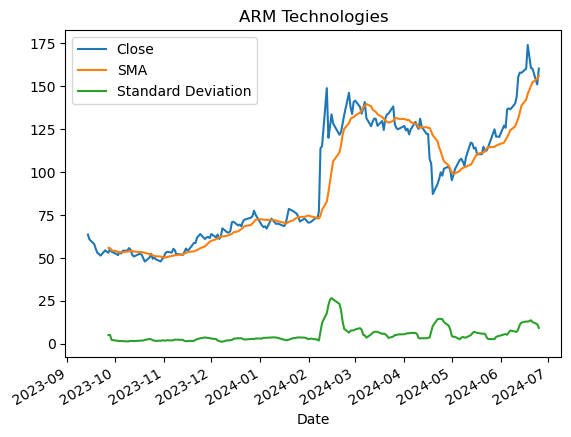

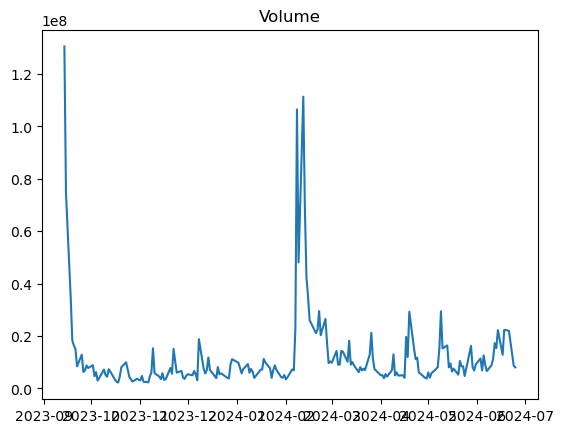

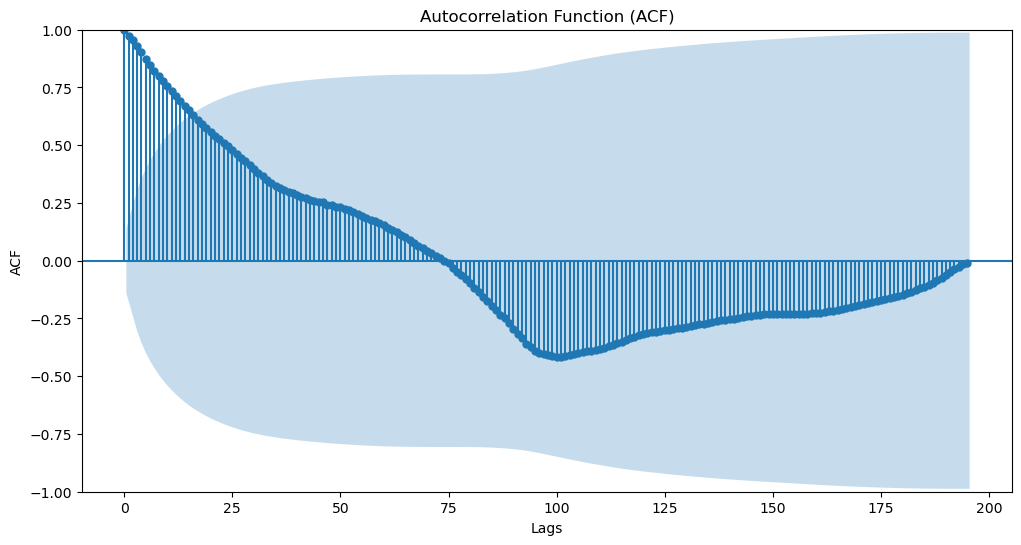

In [3]:

## Here we read the .csv data and do a time-series analysis (rolling mean)

data_ARM = pd.read_csv('StockHistData\ARM.csv', index_col='Date', parse_dates=['Date'])

#cols_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'SMA', 'Standard Deviation']
cols_to_plot = ['Close', 'SMA', 'Standard Deviation']

data_ARM['SMA'] = data_ARM['Open'].rolling(10).mean()
data_ARM['Standard Deviation'] = data_ARM['Open'].rolling(10).std()

df_ARM = pd.DataFrame(data_ARM)

data_ARM[cols_to_plot].plot()
plt.title('ARM Technologies')

plt.figure()
plt.title('Volume')
plt.plot(data_ARM['Volume'], label='Volume')

## Here we also do a auto-correlation test
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(data_ARM['Close'], lags=195, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

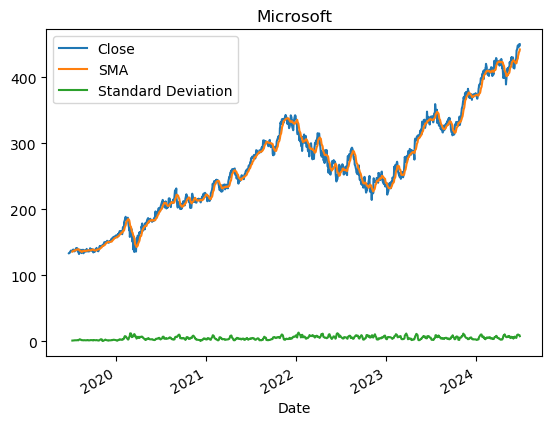

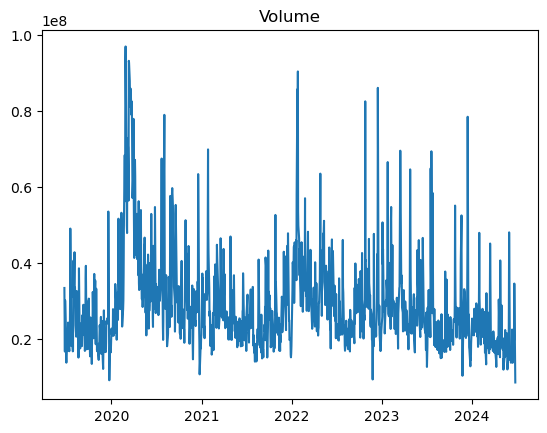

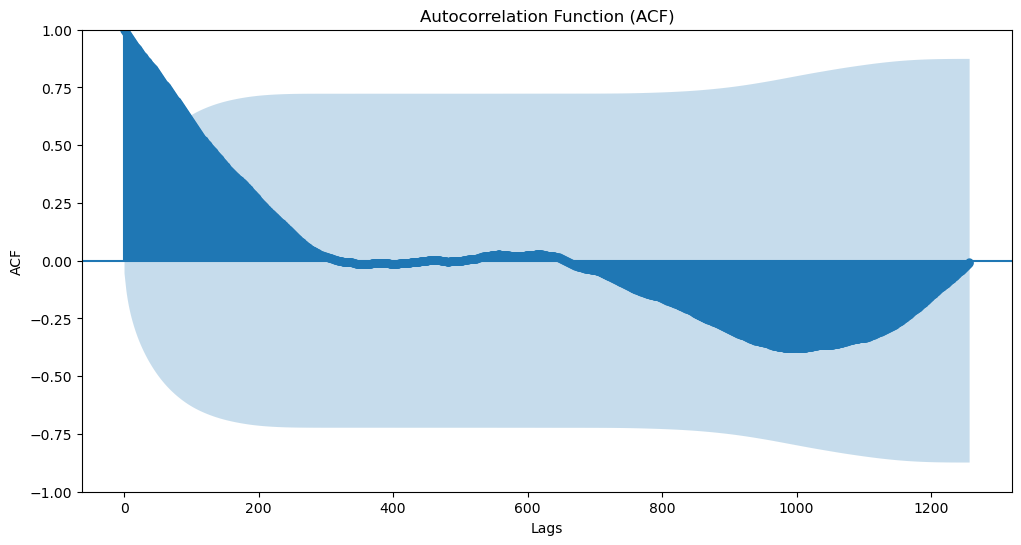

In [4]:
## Same for MSFT
data_MSFT = pd.read_csv('StockHistData\MSFT.csv', index_col='Date', parse_dates=['Date'])

#cols_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'SMA', 'Standard Deviation']
cols_to_plot = ['Close', 'SMA', 'Standard Deviation']

data_MSFT['SMA'] = data_MSFT['Open'].rolling(10).mean()
data_MSFT['Standard Deviation'] = data_MSFT['Open'].rolling(10).std()

df_MSFT = pd.DataFrame(data_MSFT)

data_MSFT[cols_to_plot].plot()
plt.title('Microsoft')

plt.figure()
plt.title('Volume')
plt.plot(data_MSFT['Volume'], label='Volume')

## Here we also do a auto-correlation test
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(data_MSFT['Close'], lags=1257, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

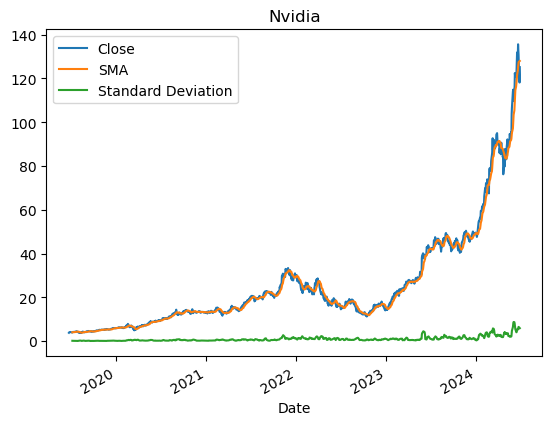

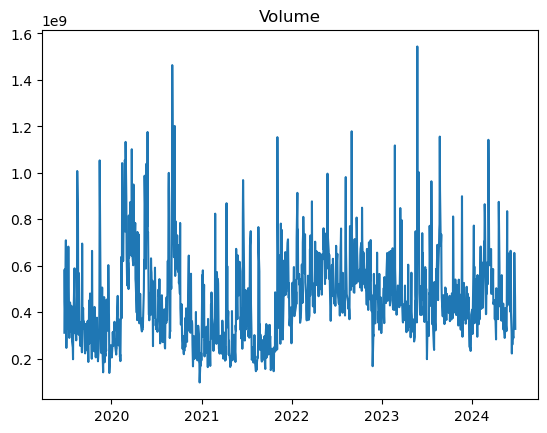

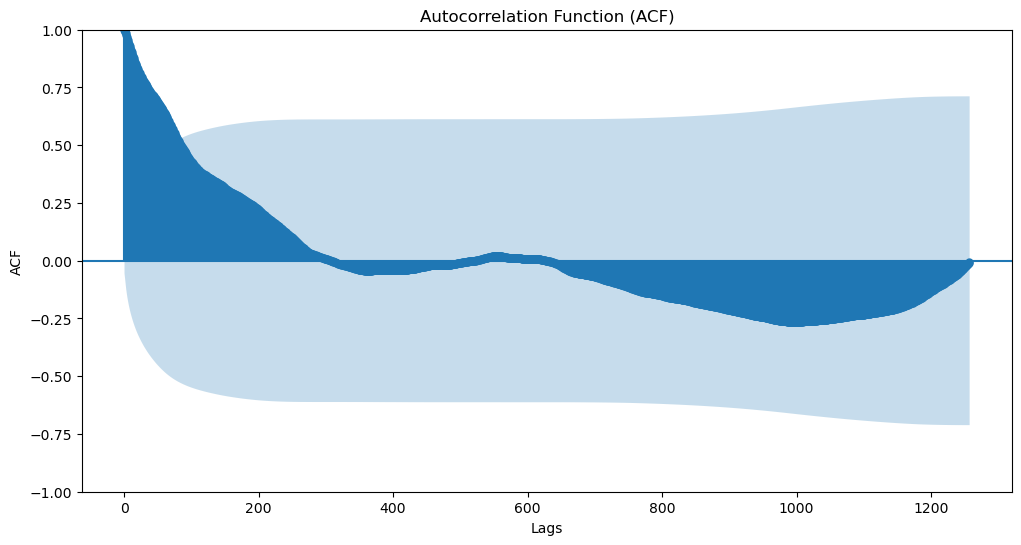

In [5]:
## Then NVDA
data_NVDA = pd.read_csv('StockHistData\\NVDA.csv', index_col='Date', parse_dates=['Date'])

#cols_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'SMA', 'Standard Deviation']
cols_to_plot = ['Close', 'SMA', 'Standard Deviation']

data_NVDA['SMA'] = data_NVDA['Open'].rolling(10).mean()
data_NVDA['Standard Deviation'] = data_NVDA['Open'].rolling(10).std()

df_NVDA = pd.DataFrame(data_NVDA)

data_NVDA[cols_to_plot].plot()
plt.title('Nvidia')

plt.figure()
plt.title('Volume')
plt.plot(data_NVDA['Volume'], label='Volume')

## Here we also do a auto-correlation test
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(data_NVDA['Close'], lags=1257, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

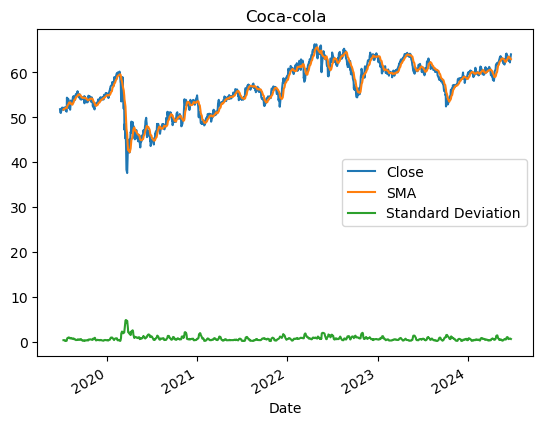

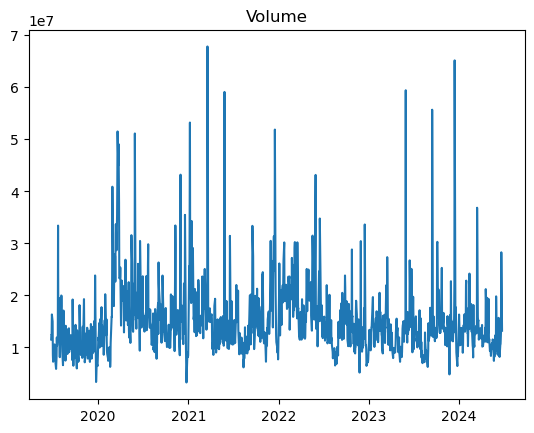

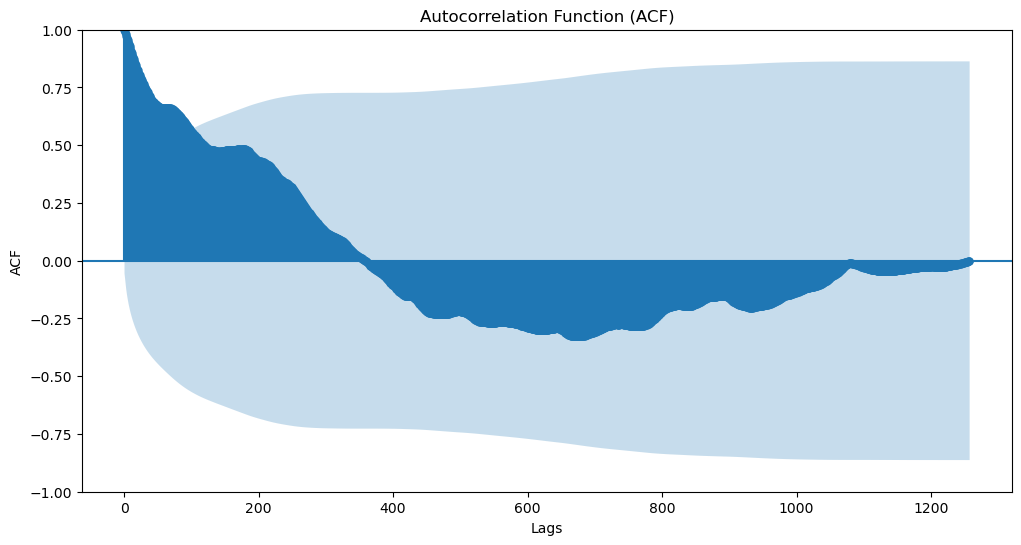

In [8]:
## Lets try for KO
data_KO = pd.read_csv('StockHistData\\KO.csv', index_col='Date', parse_dates=['Date'])

#cols_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'SMA', 'Standard Deviation']
cols_to_plot = ['Close', 'SMA', 'Standard Deviation']

data_KO['SMA'] = data_KO['Open'].rolling(10).mean()
data_KO['Standard Deviation'] = data_KO['Open'].rolling(10).std()

df_KO = pd.DataFrame(data_KO)

data_KO[cols_to_plot].plot()
plt.title('Coca-cola')

plt.figure()
plt.title('Volume')
plt.plot(data_KO['Volume'], label='Volume')

## Here we also do a auto-correlation test
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(data_KO['Close'], lags=1257, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

In [10]:
# Compute correlations between the different stocks
correlation1 = df_MSFT['Close'][-1257:].corr(df_NVDA['Close'][-1257:])
correlation1k = df_MSFT['Close'][-1257:].corr(df_NVDA['Close'][-1257:], method='kendall')
correlation1s = df_MSFT['Close'][-1257:].corr(df_NVDA['Close'][-1257:], method='spearman')

print(f"Correlation coefficient between MSFT and NVDA: {correlation1} ({correlation1k} with Kendall and {correlation1s} with Spearman)")

correlation2 = df_MSFT['Close'][-195:].corr(df_ARM['Close'][-195:])
correlation2k = df_MSFT['Close'][-195:].corr(df_ARM['Close'][-195:], method='kendall')
correlation2s = df_MSFT['Close'][-195:].corr(df_ARM['Close'][-195:], method='spearman')

print(f"Correlation coefficient between MSFT and ARM: {correlation2} ({correlation2k} with Kendall and {correlation2s} with Spearman)")

correlation3 = df_ARM['Close'][-195:].corr(df_NVDA['Close'][-195:])
correlation3k = df_ARM['Close'][-195:].corr(df_NVDA['Close'][-195:], method='kendall')
correlation3s = df_ARM['Close'][-195:].corr(df_NVDA['Close'][-195:], method='spearman')

print(f"Correlation coefficient between ARM and NVDA: {correlation3} ({correlation3k} with Kendall and {correlation3s} with Spearman)")

correlation4 = df_KO['Close'][-1257:].corr(df_NVDA['Close'][-1257:])
correlation4k = df_KO['Close'][-1257:].corr(df_NVDA['Close'][-1257:], method='kendall')
correlation4s = df_KO['Close'][-1257:].corr(df_NVDA['Close'][-1257:], method='spearman')

print(f"Correlation coefficient between KO and NVDA: {correlation4} ({correlation4k} with Kendall and {correlation4s} with Spearman)")

correlation5 = df_KO['Close'][-1257:].corr(df_MSFT['Close'][-1257:])
correlation5k = df_KO['Close'][-1257:].corr(df_MSFT['Close'][-1257:], method='kendall')
correlation5s = df_KO['Close'][-1257:].corr(df_MSFT['Close'][-1257:], method='spearman')

print(f"Correlation coefficient between ARM and NVDA: {correlation5} ({correlation5k} with Kendall and {correlation5s} with Spearman)")


Correlation coefficient between MSFT and NVDA: 0.8776729479921647 (0.8858622879417019 with Kendall and 0.9803382835161425 with Spearman)
Correlation coefficient between MSFT and ARM: 0.8672797676482682 (0.713530376929281 with Kendall and 0.8990053229628328 with Spearman)
Correlation coefficient between ARM and NVDA: 0.914174600195529 (0.7281907581685525 with Kendall and 0.8989487602556767 with Spearman)
Correlation coefficient between KO and NVDA: 0.4520561771842587 (0.4031009506982956 with Kendall and 0.6055884213036117 with Spearman)
Correlation coefficient between ARM and NVDA: 0.5705410423170577 (0.39683506290132203 with Kendall and 0.5988905924644908 with Spearman)


In [15]:
## Here we do simply Quantitative analysis (mean, std)
import numpy as np

# Sample Data
returns = np.array([0.01, 0.02, -0.01, 0.03, 0.005])

# Calculate Mean and Standard Deviation
mean_return = np.mean(returns)
std_deviation = np.std(returns)
print(f"Mean Return: {mean_return}, Standard Deviation: {std_deviation}")


Mean Return: 0.011, Standard Deviation: 0.013564659966250536


In [17]:
## Here we have code to do hypothesis testing
from scipy import stats

group_A = [0.01, 0.02, 0.015, 0.023, 0.016]
group_B = [0.02, 0.025, 0.03, 0.019, 0.021]
sig_value = 0.05

## We are doing a t-test so see if the mean of group A and group B are the same
## The test is bayesian, we assume they are until proven otherwise with a significance value of 0.05 (5%)
t_statistic, p_value = stats.ttest_ind(group_A, group_B)
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

trunc_p = '%.3f'%(100*p_value)

if p_value >= sig_value:
    print(f"Hypothesis of Group A and Group B means being equal is NOT REJECTED (significance value of {100*sig_value}%, p-value of {trunc_p}%)")
else:
    print(f"Hypothesis of Group A and Group B means being equal is REJECTED (significance value of {100*sig_value}%)")


t-statistic: -2.062089326236991, p-value: 0.07312229472370389
Hypothesis of Group A and Group B means being equal is NOT REJECTED (significance value of 5.0%, p-value of 7.312%)


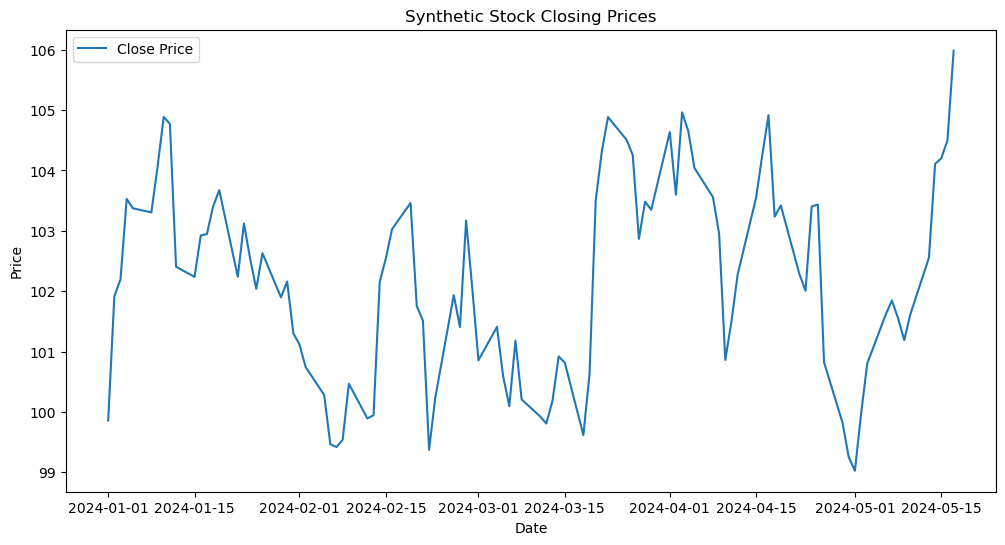

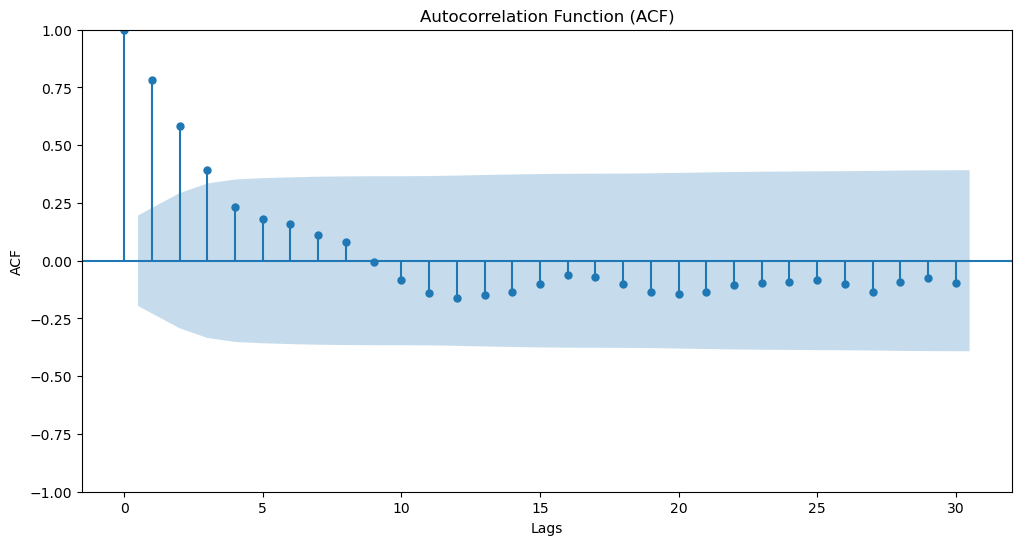

In [19]:
## Here we do some more time-series analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Seed for reproducibility (we will create synthetic data)
np.random.seed(99)

# Generate synthetic data
n_samples = 100
dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='B')  # Business days
price_changes = np.random.normal(loc=0, scale=1, size=n_samples)  # Random price changes
prices = np.cumsum(price_changes) + 100  # Simulated stock prices (random walk)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Close': prices
})

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Synthetic Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate and plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(df['Close'], lags=30, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()


In [21]:
## Here we do some predictive modelling

import numpy as np
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 3, 2.5, 4, 4.5])

# Train Model
model = LinearRegression().fit(X, y)
print(f"Coefficient: {model.coef_}, Intercept: {model.intercept_}")


Coefficient: [0.6], Intercept: 1.4


In [23]:
## Here we have some code for option pricing (black-scholes)

import scipy.stats as si
import numpy as np

def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        option_price = (S * si.norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * si.norm.cdf(d2, 0, 1))
    elif option_type == 'put':
        option_price = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0, 1) - S * si.norm.cdf(-d1, 0, 1))
    return option_price

# Example Parameters
S = 100  # Current stock price
K = 105  # Strike price
T = 1    # Time to maturity in years
r = 0.05 # Risk-free rate
sigma = 0.2 # Volatility

call_price = black_scholes(S, K, T, r, sigma, option_type='call')
print(f"Call Option Price: {call_price}")

Call Option Price: 8.021352235143176


In [25]:
## Here's some code of logistic regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample data
data = {
    'Open': [100.0, 101.0, 100.5, 101.2],
    'High': [102.0, 103.0, 102.5, 101.5],
    'Low': [98.0, 99.5, 99.0, 99.8],
    'Close': [101.0, 100.5, 101.5, 100.8],
    'Volume': [1500000, 1700000, 1800000, 1300000],
    'SMA_10': [99.5, 100.0, 100.2, 100.8],
    'RSI': [55.0, 52.5, 58.0, 59],
    'Label': [1, 0, 1, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10', 'RSI']]
y = df['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the features
scaler = StandardScaler(Y)
X_train_scaled = scaler.it_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

NameError: name 'Y' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(10)

# Generate synthetic data
n_samples = 1000
dates = pd.date_range(start='2024-01-01', periods=n_samples, freq='B')
open_prices = np.random.uniform(low=100, high=200, size=n_samples)
high_prices = open_prices + np.random.uniform(low=0, high=10, size=n_samples)
low_prices = open_prices - np.random.uniform(low=0, high=10, size=n_samples)
close_prices = open_prices + np.random.uniform(low=-5, high=5, size=n_samples)
volume = np.random.randint(low=100000, high=5000000, size=n_samples)

# Simple Moving Average (SMA) with window of 10
sma_10 = pd.Series(close_prices).rolling(window=10).mean().ffill()

# Relative Strength Index (RSI)
def calculate_rsi(series, window=14):
    delta = series.diff().ffill()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

rsi = calculate_rsi(pd.Series(close_prices))

# Label: 1 if next day's close price is higher, else 0
labels = np.where(np.roll(close_prices, -1) > close_prices, 1, 0)
labels[-1] = 0  # Last label cannot be determined

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'Close': close_prices,
    'Volume': volume,
    'SMA_10': sma_10,
    'RSI': rsi,
    'Label': labels
})

# Remove the last row as it doesn't have a valid label
df = df[:-1]

# Features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10', 'RSI']]
y = df['Label']
t = df['Date']

# Split the data
X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(X, y, t, test_size=0.33, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data type: ",X_train_scaled.dtype )
print("Data type: ",y_train.dtype )
print("Dimensions: ",np.shape(X_train_scaled))
print("Dimensions: ",np.shape(y_train))

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot some of the data to visualize
plt.figure(figsize=(12, 6))
plt.plot(dates, close_prices, label='Close Price')
plt.plot(dates, sma_10, label='SMA 10')
plt.title('Stock Prices and SMA 10')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
## Information store of how we run python script elsewhere

%run "D:\Finance Study\Python and MATLAB Code\Core.py"


Hi


<Figure size 640x480 with 0 Axes>

<BarContainer object of 1259 artists>

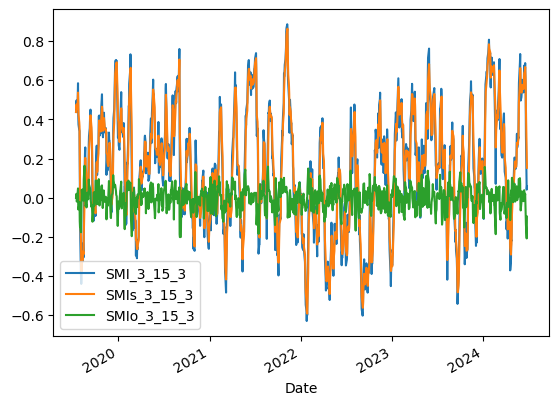

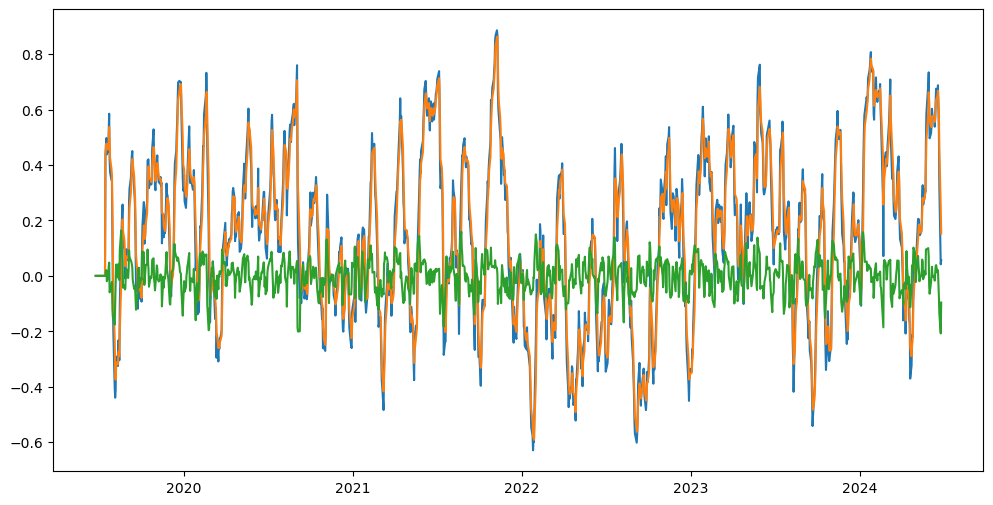

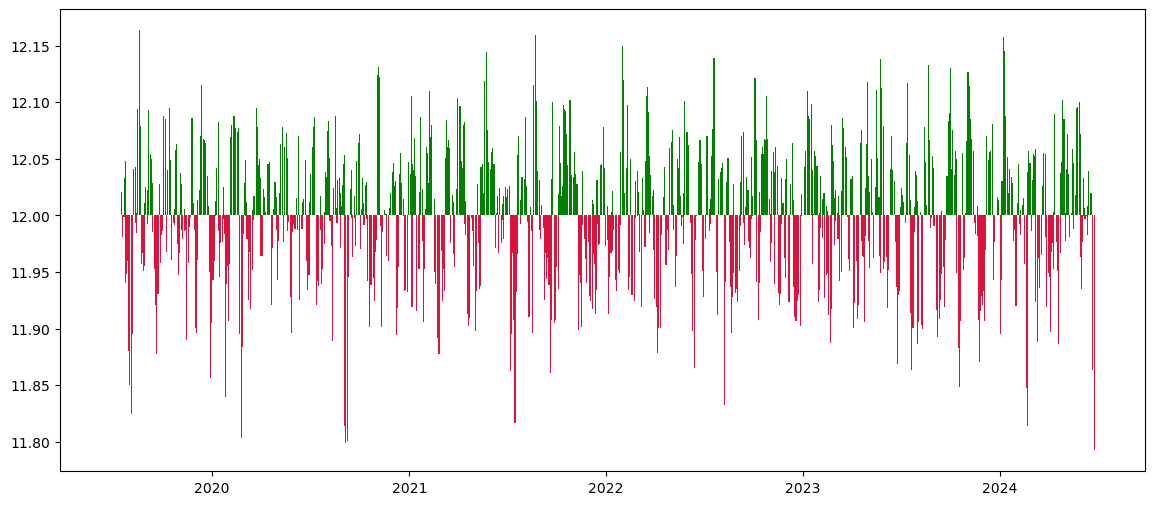

In [30]:
# Here we try to make a signal indicator from the SMIIO (Stochastic Momentum Index ergodic Indicator plus SMI ergodic Oscillator) of a stock
# The code makes an SMI of the stock by calculating the True Strength Index (TSI) of the stock using a slow and a fast period. Also makes an
# (ergodic) Indicator by using an Exponential Moving Average (EMA) using the signal period. Finally, makes (ergodic) Oscillator signal by
# subtracting the Indicator from the TSI.



fast_period = 3 # In the freq of file (days)
slow_period = 15
signal_period = 3


df_smi = ta.momentum.smi(df_NVDA['Close'],fast_period,slow_period,signal_period)


smi_name = "_{}_{}_{}".format(fast_period,slow_period,signal_period)
#SMI + smi_name is the SMI of the stock
#SMIs + smi_name is the indicator made from signal line
#SMIo + smi_name is the oscillator made by SMI - SMIs


cols_plot = ["SMI"+smi_name,"SMIs"+smi_name,"SMIo"+smi_name]

df_smi[cols_plot].plot()

df_smi.fillna(0, inplace = True) # Removing NaN values

plt.figure(figsize=(12,6))
plt.plot(df_smi)

subtrac=df_smi.iloc[:,0] - df_smi.iloc[:,1] # This is the same as SMIo
#plt.figure(figsize=(12,6))
#plt.plot(subtrac)


df_smi = df_smi.reset_index() # Get date as a non index col to use for bar plot

plt.figure(figsize=(14,6))
plt.bar(df_smi["Date"],df_smi["SMIo"+smi_name],2,12,color=np.where(df_smi["SMIo"+smi_name] < 0, 'crimson', 'green'))


## BEAUTIFULSOUP FOR WEBSCRAPING IN PYTHON
## SELENIUM FOR dynamic html


In [32]:
# Here we try to make a simple backtesting simulation model where we use an indicator to test approximate success in trading over course of a day
# or longer. We use the SMIIO model and simulate a trade whenever a condition is reached (e.g. change from negative to positive).
# The trade is initially done as 1 stock trade per instance and we assess the percentage of success (profit made), and size of success.

fast = 3
slow = 15
sig = 4

df_smiio = ta.momentum.smi(df_NVDA['Close'],fast,slow,sig)

smiio_name = "_{}_{}_{}".format(fast,slow,sig)

df_smiio = df_smiio.reset_index()

#df_smiio.fillna(0, inplace = True) # Removing NaN values


for i in range(0,len(df_smiio['SMIo'+smiio_name])):

    if np.isnan(df_smiio['SMIo'+smiio_name][i]):
        continue

    ind_diff = df_smiio['SMIo'+smiio_name][i] - df_smiio['SMIo'+smiio_name][i-1]

    last_val = df_smiio['SMIo'+smiio_name][i-1]
    
    #print(df_smiio['SMIo'+smiio_name][i])
    #print(ind_diff)


In [34]:
## Here we will write basic functions to 'purchase' and 'sell' stocks, and a function to sum up the transactions for a profit/loss measurement
histCols = ['Date','Ticker','Volume','Value','TimingState']
global dfTradeHist
dfTradeHist = pd.DataFrame(columns = histCols)

#######
def PrepDataFrame(dataFrame) -> pd.DataFrame:
    """
    Make all necessary preparation to use the dataframe in model (NOT FULLY COMPLETE). Currently this is:
    - Moving any date/time outside of dataframe index
    - Changing date/time to a full date-time style (i.e. dates-only will also include time (00:00:00))
    """
    # Guard function to get indexData (usually date) as a non index col to use (if as index) 
    if 'Date' not in dataFrame.columns: 
        dataFrame = dataFrame.reset_index()
    
    # Converts possible date-only to date-time
    dataFrame['Date'] = pd.to_datetime(dataFrame.Date, format='%Y-%m-%d %H:%M:%S')

    # Convert date-time to string (seems to create more bugs)
    #dataFrame['Date'] = dataFrame['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    return dataFrame
#######

#######
## A FUNCTION TO REMOVE DATA? PROB NOT NEEDED
#######



#######
## A SET OF FUNCTIONS TO ANALYSE STOCK DATA, TRAJECTORY, VOLATILITY ETC.
#######


#######
## FUNCTION TO MODIFY AN ACCURACY/ANALYTICS MATRIX DIRECTLY (INSTEAD OF DOING IT WITHIN THE MODEL ITSELF) FOR INTEROPERABILITY WITH MODEL EVALUATOR
#######



#######
def ResetTradeHist(name = 'dfTradeHist', cols = ['DateTime','Ticker','Volume','Value','TimingState']):
    """ Reset the trade history dataframe and remakes its columns (cols, if specified). """    
    globals()[name] = pd.DataFrame(columns = cols)
    return
#######

#######
def MakeTrade (dateTime, volume, ticker, history = None, buy = True, timingState = 'Close', declare = False) -> [[float, str, float, float, str], pd.DataFrame]:
    """
    Simulates making a specified trade and records it (using a sub-routine). Ticker price dataframe must have 'df_' prefix
    """
    # Default history input save status (take dfTradeHist as default storage dataframe)
    isDefaultHist = False
    if history is None:
        global dfTradeHist
        history = dfTradeHist.copy()
        isDefaultHist = True
    
    
    datasetName = 'df_'+ticker

    # The 1st part gets the global dataset, 2nd searches the datetime and 3rd gets the timings state price
    unitValue = globals()[datasetName][ globals()[datasetName]['Date'] == dateTime ][timingState].values[0]
    
    totalValue = -unitValue * volume
    transaction = 'bought'
    
    if not buy:
        transaction = 'sold'

    if declare == True:
        print(f"{volume} {ticker} stock(s) {transaction} at total price {-totalValue} (unit price {unitValue}) at {dateTime}")

    if not buy:
        totalValue = -totalValue

    result = [dateTime, ticker, volume, totalValue, timingState]
    
    ## Store in history
    history = RecordAction(result, history)

    # Default history location (if None then it won't update the original dataframe otherwise)
    if isDefaultHist:
        dfTradeHist = history.copy()
    
    return [[dateTime, ticker, volume, totalValue, timingState], history]
#######
#######
def RecordAction(action, dataFrame) -> pd.DataFrame:
    """
    Records action taken into a history dataframe.
    Note: Make sure the action row size is the same as the column size in the dataFrame.
    For each column take action indices and add to the existing history dataFrame.
    """
    
    # A slightly different process for first action recorded to avoid python warning
    if dataFrame.size == 0: # If no data
        
        print('Recording first input into trade history')
        dataFrame = pd.DataFrame(columns = dataFrame.columns)

    # Adding all actions into a dictionary to append to dataFrame
    appendDict = {}
    
    for i in range(0,len(action)):
        appendDict[dataFrame.columns[i]] = action[i]
    appendSeries = pd.Series(appendDict)    
    
    return pd.concat([dataFrame,appendSeries.to_frame().T], ignore_index=True)
#######
#######
def EvaluateModel(dataFrame, *arguments, **keywords) -> float:
    """
    This function is supposed to take the trade/call history and evaluate its properties,
    such as success (profit/loss) and other properties (e.g. profit vs. loss freq. etc.).
    """
    # Additional things to implement:
    # Exchange rate of currency effects
    # Trading costs
    
    
    print('------------------')
    print('Evaluating current algo model...')
    
    # Stratifying data based on ticker
    stratDF = dataFrame.groupby('Ticker').apply(lambda x: x)
    stratDF = stratDF.drop(columns=['Ticker'])

    # Extended output
    if any(val == 'Extended' for val in keywords.values()):
        print('List of trades to be evaluated:')
        print(stratDF)


    # Make a DF of compiled stats
    basicStatsCols = ['LongVol','ShortVol','RemainVol','Cost','Income','Profit']
    compileDF = pd.DataFrame(columns = basicStatsCols)
    

    # Takes list of the (multi-level) index of DF (tuple) and converts to
    # dictionary for unique 'Ticker' key 
    print('List of tickers traded:')
    for key in dict(stratDF.index.tolist()).keys():
        print(key)
        # key is the different ticker names

    # Implement the evaluation for each ticker traded here
    for key in dict(stratDF.index.tolist()).keys():
        # stratDF.loc[key] is the different ticker trades each in own DF
        tickerDF = stratDF.loc[key]

        # Extended output
        for value in keywords.values():
            if value == 'Verbose':
                print('Trade history of ticker ' + key +':')
                print(tickerDF)

        sumVal = tickerDF['Value'].sum()
        
        ## Basic stats
        sumShortVol = 0
        sumCost = 0 # Cost is for purchasing the share etc.
        sumLongVol = 0
        sumIncome = 0 # Income is obtained by selling
        for i in range(0,len(tickerDF['Value'])):
            if tickerDF['Value'].iloc[i] > 0:
                sumShortVol = sumShortVol + tickerDF['Volume'].iloc[i]
                sumIncome = sumIncome + tickerDF['Value'].iloc[i]
            else:
                sumLongVol = sumLongVol + tickerDF['Volume'].iloc[i]
                sumCost = sumCost - tickerDF['Value'].iloc[i]
        profit = sumIncome - sumCost
        specProfit = profit*2/(sumShortVol+sumLongVol)
    
        # To implement a existing position closing system (to evaluate the model more accurately)
        remainVol = sumLongVol - sumShortVol
        if remainVol != 0:
            print(Fore.RED)
            print(' !!!!!!!!!!')
            print('There is an existing open position in ' + key + '! This may impact the accuracy of the model evaluation.')
            if value == 'Extended':
                if remainVol > 0:
                    print('Open position size: ' + str(remainVol) + ' shares long.')
                else:
                    print('Open position size: ' + str(-remainVol) + ' shares short.')
            
            print('Existing positions will be closed.')
            print(' !!!!!!!!!!')
            print(Fore.BLACK)
        
            # Closing existing positions using last unit price
            datasetName = 'df_' + key
            
            # Portfolio value is positive if long (remain vol > 0)
            portValue = remainVol * globals()[datasetName]['Close'][len(globals()[datasetName]['Close'])-1]
            
            finalProfit = profit + portValue
            if portValue > 0:
                finalCost = sumCost
                finalIncome = sumIncome + portValue
            else:
                finalCost = sumCost + portValue
                finalIncome = sumIncome
    
        ## Advanced stats 



        # Adding all basic stats for each ticker into an array then converting into dictionary to append to dataFrame
        # basicStats uses 'final' position if unclosed     
        basicStats = []        
        if remainVol != 0:
            basicStats = [sumLongVol, sumShortVol,remainVol,finalCost,finalIncome,finalProfit]
        else:
            basicStats = [sumLongVol, sumShortVol,remainVol,sumCost,sumIncome,profit]

        # Append dictionary for dataFrame
        appendDict = {}
        for i in range(0,len(basicStats)):
            appendDict[compileDF.columns[i]] = basicStats[i]

        compileDF = compileDF._append(appendDict, ignore_index=True)
    
        # Currently only evaluates the profit/loss levels (not including closing existing positions)
        print('===================\n\nCalculating basic evaluation stats in ticker '+key+':')
        
        print('Current profit/loss stats (not closing existing positions):')
        print('Total profit from all trades: ' + str(sumVal))
        print('Total cost: ' + str(sumCost))
        print('Total income: ' + str(sumIncome))
        print('Total profit: ' + str(profit))
        
        print('Profit Margin: ' + str(profit/sumCost))
        print('Specific Profit (per volume traded): ' + str(specProfit)) # Calculated as avg. of long and short vol. (if shares outstanding)
    
        if remainVol != 0:
            print(Fore.BLUE)
            print('Current profit/loss stats (after closing existing positions):')
            print('Remaining portfolio value (before close): ' + str(portValue))
            print('Final cost: ' + str(compileDF['Cost'].sum()))
            print('Final income: ' + str(compileDF['Income'].sum()))
            print('Final profit from all trades: ' + str(compileDF['Profit'].sum()))
            
            print('Final Profit Margin: ' + str(compileDF['Profit'].sum()/compileDF['Cost'].sum()))
            print(Fore.BLACK)
        
        print('===================')


    if any(val == 'AddEval' for val in keywords.values()):
        for input in arguments: # Do not need to use *args this way but I chose to, its fine until I want to use more than 1 args dataframe
            if isinstance(input, pd.DataFrame):

                ## TO ADD TRADING ANALYTICS HERE, THIS SHOULD ONLY TAKE IN OUTPUT FROM ELSEWHERE
                ## SHOULD CREATE FUNCTIONS TO DIRECTLY MODIFY ACCURACY MATRIX INSTEAD OF MAKING WITHIN EACH MODEL
                ## SHOULD ALSO CREATE STOCK ANALYSER METHOD SEPARATELY

            
                print(Fore.GREEN)
                print('#################################\nCalculating additional model evaluations from given accuracy dataFrame:')
                print('Model efficiency stats:')
                print('Trade accuracy (trades being incorrect by instance, not volume?): (NOT IMPLEMENTED YET)')
                print('Trade efficiency (how many trades are not correct?): (NOT IMPLEMENTED YET)')
                print('Model Loss (how far are trades from actual optimal points): (NOT IMPLEMENTED YET)')
                print('#################################')
                print(Fore.BLACK)





    print('------------------')
    return 1

df_NVDA = PrepDataFrame(df_NVDA)
df_MSFT = PrepDataFrame(df_MSFT)
df_KO = PrepDataFrame(df_KO)

[NVDA_L1,_] = MakeTrade('2019-07-01 00:00:00', 10.5, 'NVDA')
[MSFT_L1,_] = MakeTrade('2019-10-01 00:00:00', 6, 'MSFT')
[NVDA_S1,_] = MakeTrade('2022-07-01 00:00:00', 10.5, 'NVDA', buy = False)
[NVDA_S2,_] = MakeTrade('2023-06-01 00:00:00', 100, 'NVDA', buy = False)
[NVDA_L2,_] = MakeTrade('2023-08-01 00:00:00', 99, 'NVDA', buy = True)
[MSFT_S1,_] = MakeTrade('2022-07-01 00:00:00', 6, 'MSFT', history = None, buy = False)

num = EvaluateModel(dfTradeHist, depth = 'AddEval', debug = 'Simple')


Recording first input into trade history
------------------
Evaluating current algo model...
List of tickers traded:
MSFT
NVDA

Calculating basic evaluation stats in ticker MSFT:
Current profit/loss stats (not closing existing positions):
Total profit from all trades: 735.05988
Total cost: 822.420042
Total income: 1557.479922
Total profit: 735.05988
Profit Margin: 0.8937767107577371
Specific Profit (per volume traded): 122.50998

 !!!!!!!!!!
There is an existing open position in NVDA! This may impact the accuracy of the model evaluation.
Existing positions will be closed.
 !!!!!!!!!!


Calculating basic evaluation stats in ticker NVDA:
Current profit/loss stats (not closing existing positions):
Total profit from all trades: -518.3211249999999
Total cost: 4647.8126250000005
Total income: 4129.4915
Total profit: -518.3211250000004
Profit Margin: -0.11151936767244362
Specific Profit (per volume traded): -4.712010227272731

Current profit/loss stats (after closing existing positions):
Rema

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_35424\656369708.py:225: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compileDF = compileDF._append(appendDict, ignore_index=True)


In [174]:
# Creating sub-routines for models here

# Here we will create a sub-routine that provides conditions for specified trades when a condition is met.
# The basic one will be when a set of values becomes positive (from a negative/zero value).


def WhenPositive(dataset,searchData,indexData):
    """
    This function returns set of independent variables (outData, e.g. date/time) in the selected data
    to be searched (indexData) from the dataset, when searchData (e.g. price) turns positive from negative.
    searchData and indexData are strings of the column names.
    """
    
    # Indexed (observed) dataset (independent var.)
    obsDataset = dataset[indexData]

    # Searched dataset (dependent var.)
    searchDataset = dataset[searchData]

    # Outputted dataset array (indep. var.)
    outDataset = []

    # Goes through all points to get when turn positive
    for i in range(1,len(obsDataset)):
        # range starts from 1 because need the i-1'th datapoint
        # If negative, irrelevant so skip step
        if searchDataset.iloc[i] <= 0:
            continue

        # If positive but last step negative, record
        if searchDataset.iloc[i-1] < 0:
            outDataset = outDataset + [obsDataset.iloc[i]]

    # Note output is an array for efficiency
    return outDataset

def WhenNegative(dataset,searchData,indexData):
    """
    This function returns set of independent variables (outData, e.g. date/time) in the selected data
    to be searched (indexData) from the dataset, when searchData (e.g. price) turns negative from positive.
    searchData and indexData are strings of the column names.
    Same as WhenPositive but reverse as you cant just use -dataset.
    """
    
    # Indexed (observed) dataset (independent var.)
    obsDataset = dataset[indexData]

    # Searched dataset (dependent var.)
    searchDataset = dataset[searchData]

    # Outputted dataset array (indep. var.)
    outDataset = []

    # Goes through all points to get when turn negative
    for i in range(1,len(obsDataset)-1):
        # range starts from 1 because need the i-1'th datapoint
        # range ends at len(obsDataset)-1 if last datapoint is 'live' and pending update
        # If positive, irrelevant so skip step
        if searchDataset.iloc[i] >= 0:
            continue

        # If negative but last step positive, record
        if searchDataset.iloc[i-1] > 0:
            outDataset = outDataset + [obsDataset.iloc[i]]

    # Note output is an array for efficiency
    return outDataset

def JumpChecker(dataset, searchData, indexData, jumpThresh, jumpPeriod = 1, signalPeriod = 1):
    """
    This function returns set of independent variables (outData, e.g. date/time) in the selected data
    to be searched (indexData) from the dataset, when searchData (e.g. price) jumps (or changes) a
    certain percentage (jumpThresh) on average of a (signalPeriod) time period, from its last (jumpPeriod)
    time periods ago.
    searchData and indexData are strings of the column names.
    """

    # Error input guard (fixes negative input values for real numbers)
    jumpThresh = abs(jumpThresh)
    jumpPeriod = abs(jumpPeriod)
    
    # Indexed (observed) dataset (independent var.) - dataset[indexData]
    # Searched dataset (dependent var.) - dataset[searchData]

    # Outputted dataset array pair (independent var., and bool) [['Time'],['Jump?']]
    outDataset = []
    jumpTime = []
    isJump = []
    
    # Get rolling simple moving average of dataset (SMA as signal safety vs instant drop/jumps or spread drop/jumps)
    copyDataset = dataset.copy() # Make shallow copy to not bloat original dataset
    copyDataset['SMA ' + searchData] = copyDataset[searchData].rolling(window = signalPeriod).mean()
    
    # Goes through all points to get when turn negative
    for i in range(jumpPeriod,len(dataset[indexData])-1):
        
        # Range starts from jumpPeriod because SMA starts from jumpPeriod-1'th datapoint (as index starts at 0),
        # but need the value before jumpPeriod (so +1) since that is the drop signal datapoint. 
        # Range ends at len(obsDataset)-1 if last datapoint is 'live' and pending update


        # Error guard function (0 val input), skip step
        if dataset[searchData][i-jumpPeriod] == 0:
            continue

        # Jump ratio is the [amount at time-index i] - [amount at i-jumpPeriod (pre-jump) time] / pre-jump value (normalisation) 
        jumpRatio = (copyDataset['SMA ' + searchData][i] - copyDataset['SMA ' + searchData][i-jumpPeriod])/copyDataset['SMA ' + searchData][i-jumpPeriod]
        #jumpRatio = (dataset[searchData][i] - dataset[searchData][i-jumpPeriod])/dataset[searchData][i-jumpPeriod]
        
        # Check for value jump (above jumpThresh) or drop (below -jumpThresh), if so, record point
        if jumpRatio > jumpThresh:
            #print('Value jump detected: ' + str(jumpRatio*100) + '%.')
            # Record data (as jump)
            jumpTime = jumpTime + [dataset[indexData][i]]
            isJump = isJump + [True]

            #outDataset = outDataset + [[dataset[indexData][i], True]]

        elif jumpRatio < -jumpThresh:
            #print('Value drop detected: ' + str(-jumpRatio*100) + '%.')
            # Record data (as drop)
            jumpTime = jumpTime + [dataset[indexData][i]]
            isJump = isJump + [False]
            
            #outDataset = outDataset + [[dataset[indexData][i], False]]

    outDataset = [jumpTime, isJump]
    # Note output is an array for efficiency
    return outDataset


In [176]:
## Testing playground to add into the model evaluator


# Note: using frozenset() for checks can make it faster for big datasets

In [178]:

def SMIFlipTradeModel(ticker, fast_period, slow_period, signal_period, timingState = 'Close'):
    """This trade model trades when SMIIO of ticker becomes ('flips') to positive (long) and negative (short)."""

    global histCols
    # Create trade history dataframe
    tradeHist = pd.DataFrame(columns = histCols)
    
    # Get and prep relevant dataFrame
    df_ticker = PrepDataFrame(globals()['df_'+ticker])

    # Apply SMI model to get result dataframe (and add date column)
    df_smi = ta.momentum.smi(df_ticker['Close'],fast_period,slow_period,signal_period)
    df_smi['Date'] = df_ticker['Date'].copy()
    
    smiConfigName = "_{}_{}_{}".format(fast_period,slow_period,signal_period)
    # SMI + smi_name is the SMI of the stock
    # SMIs + smi_name is the indicator made from signal line
    # SMIo + smi_name is the oscillator made by SMI - SMIs
    
    smiTypeNames = ["SMI"+smiConfigName,"SMIs"+smiConfigName,"SMIo"+smiConfigName]
    
    # Removing NaN values
    df_smi.fillna(0, inplace = True) 
    
    buyFlip = WhenPositive(df_smi,smiTypeNames[2],'Date')
    sellFlip = WhenNegative(df_smi,smiTypeNames[2],'Date')

    # Currently only trade one stock per instance, can be made variable.
    for i in range(0,len(buyFlip)):
        [maketrade, tradeHist] = MakeTrade(buyFlip[i].strftime('%Y-%m-%d %H:%M:%S'), 1, ticker, history = tradeHist)
    
    for i in range(0,len(sellFlip)):
        [maketrade, tradeHist] = MakeTrade(sellFlip[i].strftime('%Y-%m-%d %H:%M:%S'), 1, ticker, history = tradeHist, buy = False)
    
    eval = EvaluateModel(tradeHist, depth = 'AddEval', debug = 'Extended')
    
    return tradeHist

def SuddenChangeTradeModel(ticker, changeThresh = 0.05, changePeriod = 1, revertRatio = 0.9, safetyPeriod = 0, timingState = 'Close'):
    """
    This model trades when a ticker suddenly changes up (short) or down (long) by a certain amount
    (Thresh), and 'reverts' position when it goes back up.
    
    Details: Can revert the up or down jumps partially using a setting (revertRatio), and can add safety factors
    to the initation signal (safetyPeriod). Currently only takes one ticker.
    """
    
    # Create trade history (global, local seems to make issues)
    global histCols
    tradeHist = pd.DataFrame(columns = histCols)
    
    # Get relevant dataFrame and pre-process it
    df_ticker = globals()['df_'+ticker].copy()
    df_ticker = PrepDataFrame(df_ticker)

    # Obtain timings of significant price changes ([Date of change ending, bool if its jump (up)])
    changeTimings = JumpChecker(df_ticker, timingState, 'Date', changeThresh, jumpPeriod = changePeriod, signalPeriod = safetyPeriod)
    # Make dummy ticker to establish repurchase date
    df_dummy = copy.deepcopy(df_ticker)
    
    # Currently only trade one stock per instance, can be made variable.
    for i in range(0,len(changeTimings[0])):
        
        # If jump
        if changeTimings[1][i]:
            # Sell now, buy later
            [makeTrade, tradeHist] = MakeTrade(changeTimings[0][i].strftime('%Y-%m-%d %H:%M:%S'), 1, ticker, history = tradeHist, buy = False)

        else: # If drop
            # Buy now, sell later
            [makeTrade, tradeHist] = MakeTrade(changeTimings[0][i].strftime('%Y-%m-%d %H:%M:%S'), 1, ticker, history = tradeHist)

    
    # Get the time and value of stock pre-jump after all 'procedure starting' trades are done (to be used for revert trades)
    # Sudden change is generally referred to as Jump here for simplicity
    # This is done at end to not enlarge list during iterations

    # This is a list comprehension; result (preJumpIndex) is left (i - changePeriod) for output (i, _)
    # (i is index num, x/t is value itself) in input variable. Can also add boolean
    # condition after (i.e. if tradeHist['Date'] = 01-01-2023)
    jumpTime = [x for _, x in enumerate(tradeHist['Date'])] # Note x is in str not timestamp
    jumpIndex = [i for i, t in enumerate(df_ticker['Date']) if t.strftime('%Y-%m-%d %H:%M:%S') in jumpTime]
    jumpValue = [df_ticker[timingState][i] for i in jumpIndex]
    preJumpValue = [df_ticker[timingState][i - changePeriod] for i in jumpIndex]

    revertValue = [jumpValue[i] + revertRatio*(preJumpValue[i] - jumpValue[i]) for i in range(0,len(jumpValue))]

    # Get (spot - revert) values and check for negative/positive first swap point for each initiation trade and
    # make a reversion trade at that point.
    # We will put each reversion point of a trade on the initiation trade time in the dataframe
    df_dummy['ReversionVal'] = None
    df_dummy['ReversionDate'] = None
    df_dummy['UnclosedTrade'] = None # To highlight unclosed trades
    
    for i in range(0,len(jumpIndex)):
        # i is out of the number of jumps traded, j is the index (in the dataframe) where the trade is done.
        j = jumpIndex[i]

        # We use .loc to get j'th point in 'Reversion' column as it takes the variable in memory and not its mirror/copy.
        df_dummy.loc[j,('ReversionVal')] = revertValue[i]
        # df_dummy['Reversion'][i] is CHAINED INDEXING and won't work because it calls
        # df_dummy.__getitem__('Reversion).__setitem__(i) = ... which may not be applied to df_dummy location
        # in memory layout (as getitem) and be thrown out immediately. But, .loc dodges this by having __setitem__ only.
        # Note: this wouldnt be an issue if the chained indexing happened on the other side (unless doing assignment?).

        # The spot - reversion values (i'th value happens at index j within dataframe)
        df_dummy['DistToRev'] = None
        df_dummy['DistToRev'] = df_dummy['Close'][j:] - revertValue[i]
        
    
        # Distance (of value at first trade) to reversion point is positive if jump (as immediately greater than
        # reversion point), and negative if drop (immediately below reversion point).
        # Thus, depending on first value we know what if buy or sell first, then select if WhenPositive or WhenNegative
        if df_dummy['DistToRev'][j] > 0:
            # Buy back now
            # To scan and find the first point distance-to-reversion value changes sign (becomes negative)
            scanRange = range( j, len(df_dummy['DistToRev']) )
            reverseTrade = WhenNegative(df_dummy.iloc[scanRange],'DistToRev','Date')
            if len(reverseTrade) != 0:
                [makeTrade, tradeHist] = MakeTrade(reverseTrade[0].strftime('%Y-%m-%d %H:%M:%S'), 1, ticker, history = tradeHist)
            else:
                print('Unclosed short detected at time: ' + df_dummy['Date'][j].strftime('%Y-%m-%d %H:%M:%S'))
                print('Unclosed trades can cause significant losses! Initial trade elected to be cancelled.')
                df_dummy.loc[j,('UnclosedTrade')] = df_dummy['Close'][j]
                [makeTrade, tradeHist] = MakeTrade(changeTimings[0][i].strftime('%Y-%m-%d %H:%M:%S'), 1, ticker, history = tradeHist)


        elif df_dummy['DistToRev'][j] < 0:
            # Sell back now
            # To scan and find the first point distance-to-reversion value changes sign (becomes positive)
            scanRange = range( j, len(df_dummy['DistToRev']) )
            reverseTrade = WhenPositive(df_dummy.loc[scanRange],'DistToRev','Date')
            if len(reverseTrade) != 0:
                [makeTrade, tradeHist] = MakeTrade(reverseTrade[0].strftime('%Y-%m-%d %H:%M:%S'), 1, ticker, history = tradeHist, buy = False)
            else:
                print('Unclosed long detected at time: ' + df_dummy['Date'][j].strftime('%Y-%m-%d %H:%M:%S'))
                print('Unclosed trades can cause significant losses! Initial trade elected to be cancelled.')
                df_dummy.iloc[j,('UnclosedTrade')] = df_dummy['Close'][j]
                [makeTrade, tradeHist] = MakeTrade(changeTimings[0][i].strftime('%Y-%m-%d %H:%M:%S'), 1, ticker, history = tradeHist, buy = False)

        else:
            raise ValueError('The immediate distance of price to reversion trade point should not be 0 or NaN.')

    # Display graphical data of the model (when trades were done, size of trades). (Also try to display the reversion datasets.)
    print(df_dummy.to_string())
    plt.figure(figsize=(12,6))
    plt.plot(df_dummy['Date'],df_dummy['ReversionVal'])
    plt.plot(df_dummy['Date'],df_dummy['Close'])
    plt.plot(df_dummy['Date'],df_dummy['UnclosedTrade'])
    

    eval = EvaluateModel(tradeHist, df_dummy, depth = 'AddEval', debug = 'Extended')

    # AFTER THIS CREATE A MODEL CLASS AND USE IT TO CREATE A CUSTOM MODEL TYPE VARIABLE WITH CALLABLE OUTPUT VALUES
    # AND CUSTOMISABLE INPUTS
    
    return tradeHist




Recording first input into trade history
Unclosed short detected at time: 2019-08-20 00:00:00
Unclosed trades can cause significant losses! Initial trade elected to be cancelled.
Unclosed short detected at time: 2019-08-21 00:00:00
Unclosed trades can cause significant losses! Initial trade elected to be cancelled.
Unclosed short detected at time: 2019-09-10 00:00:00
Unclosed trades can cause significant losses! Initial trade elected to be cancelled.
Unclosed short detected at time: 2019-09-11 00:00:00
Unclosed trades can cause significant losses! Initial trade elected to be cancelled.
Unclosed short detected at time: 2019-09-12 00:00:00
Unclosed trades can cause significant losses! Initial trade elected to be cancelled.
Unclosed short detected at time: 2019-09-13 00:00:00
Unclosed trades can cause significant losses! Initial trade elected to be cancelled.
Unclosed short detected at time: 2019-10-15 00:00:00
Unclosed trades can cause significant losses! Initial trade elected to be canc

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_32644\3104653422.py:208: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compileDF = compileDF._append(appendDict, ignore_index=True)


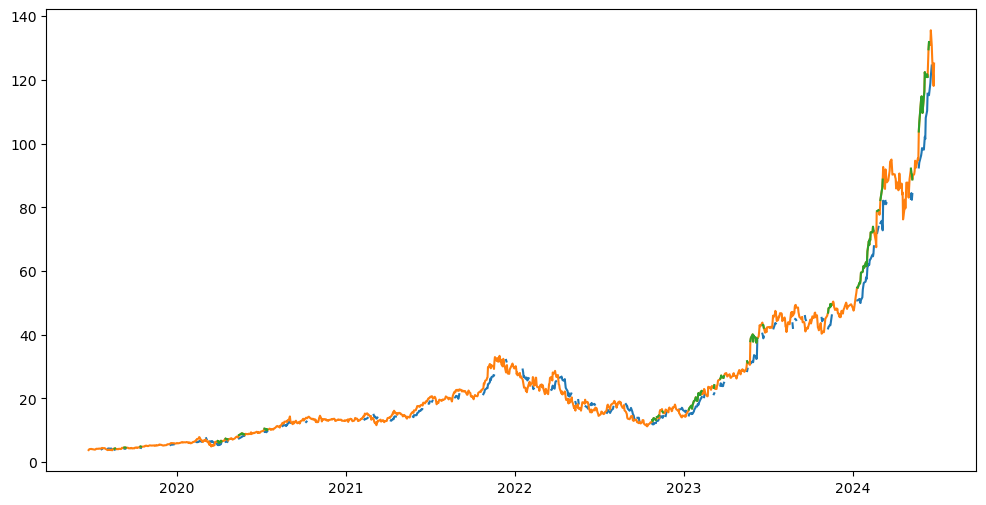

In [222]:
data = SuddenChangeTradeModel('NVDA', 0.1, 10, 0.75, 2)

#data = SMIFlipTradeModel('NVDA', 3, 10, 5)


###
###
# The code seems to work as intended but I will check again, but the method seems to not work. There could be at least 3-5 reasons.
# 1) Selling the buying (and vice versa) does not work if the stock trajectory long-term is upward as there will be cases where you cannot sell again
# (and when forced to close position, are at a loss).
# 2) Linked to 1) the periodicity of the model application means if applied at the wrong timeframe (granularity) i.e. each datapoint is day and
# not hour or 15 mins, it causes loss as the trajectory of the model is more refined and there will be more dips and peaks.
# 3) The code should be also tested for models of different trajectories (long-term, not related to granularity), as perhaps that influences the
# outcome more than the effect of granularity.
# 4) A general loss-stop missing, maybe the biggest losses are due to a lack of loss-stop method and a bleed in the earlier trades.
# 5) Perhaps the method itself is statistically bad/incorrect (i.e. when a jump happens the stock is likelier than not to keep going up and not
# reverting)
###
# Note that removing unclosed trades fixes all issues as hypothesized. Max. profit margin is approx. jumpRatio*reversionRatio. But issue is we cannot
# know in advance if there will be unclosed trades unless we know the trajectory of the stock or if we use a stop-loss

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3]
[10, 2, 3, 4]
yes


In [68]:
x = [6, 2 ,4 ,5]
tru = False
if x.any(1):
    tru = True
print(tru)

AttributeError: 'list' object has no attribute 'any'